In [ ]:
!pip install Pypdf


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.8/295.8 kB 10.8 MB/s eta 0:00:00


In [ ]:
import pypdf
from pypdf import PdfReader
import os
def extract_text_from_pdf(pdf_path):
    text = ""
    reader = PdfReader(pdf_path)
    num_pages = len(reader.pages)
    for page_num in range(num_pages):
            page = reader.pages[page_num]
            text += page.extract_text()
    return text

# pdf_path should be the directory containing your PDFs
pdf_directory = '/content/drive/MyDrive/GLM'
all_text = ""
# Iterate over files within the directory
for pdf_file in os.listdir(pdf_directory):
    # Check if the file is a PDF
    if pdf_file.endswith('.pdf'):
        pdf_path = os.path.join(pdf_directory, pdf_file)
        pdf_text=extract_text_from_pdf(pdf_path)
        all_text += pdf_text + "\n"
with open('combined_text.txt', 'w', encoding='utf-8') as text_file:
    text_file.write(all_text)

In [ ]:
!pip install gensim
!pip install pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 53.1 MB/s eta 0:00:00


In [ ]:
import spacy
import gensim
import nltk
nltk.download('punkt')
import gensim.corpora as corpora
from gensim.models import CoherenceModel
import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


**Text Preprocessing**

In [ ]:
# Lower case conversion
data=all_text.lower()
data

"government of india\ninterim budget 2024-2025\nspeech\nof\nnirmala sitharaman\nminister of finance\nfebruary 1,  2024 \ncontents  \n \npart – a \n page no.  \nintroduction  1 \ninclusive development and growth  2 \nsocial justice   3  \nexemplary  track record of governance,  \ndevelopment and performance (gdp)  7 \neconomic management  8 \nglobal context  9 \nvision for ‘viksit bharat’  10 \nstrategy for  ‘amrit kaal’  11 \ninfrastructure development  17 \namrit kaal as kartavya kaal  22 \nrevised estimates 2023 -24 23 \nbudget estimates 2024 -25 23 \npart – b \ndirect taxes  25 \nindirect taxes   26 \neconomy – then and now  28 \n  \n  1 \n interim budget 2024 -2025  \nspeech of  \nnirmala sitharaman  \nminister of finance  \nfebruary 1, 2024  \nhon’ble speaker,  \n i present the interim budget for 2024 -25.  \nintroduction  \n1. the indian  economy  has witnessed profound positive \ntransformation in the last ten years. the people of india are \nlooking ahead to the future with hop

In [ ]:
# punctutation removal
import string
punctuations = string.punctuation
data = data.translate(str.maketrans('', '', punctuations))
data

'government of india\ninterim budget 20242025\nspeech\nof\nnirmala sitharaman\nminister of finance\nfebruary 1  2024 \ncontents  \n \npart – a \n page no  \nintroduction  1 \ninclusive development and growth  2 \nsocial justice   3  \nexemplary  track record of governance  \ndevelopment and performance gdp  7 \neconomic management  8 \nglobal context  9 \nvision for ‘viksit bharat’  10 \nstrategy for  ‘amrit kaal’  11 \ninfrastructure development  17 \namrit kaal as kartavya kaal  22 \nrevised estimates 2023 24 23 \nbudget estimates 2024 25 23 \npart – b \ndirect taxes  25 \nindirect taxes   26 \neconomy – then and now  28 \n  \n  1 \n interim budget 2024 2025  \nspeech of  \nnirmala sitharaman  \nminister of finance  \nfebruary 1 2024  \nhon’ble speaker  \n i present the interim budget for 2024 25  \nintroduction  \n1 the indian  economy  has witnessed profound positive \ntransformation in the last ten years the people of india are \nlooking ahead to the future with hope and optimism 

In [ ]:
# Remove special charecters
def remove_special_characters(text):
    special_chars = "\'!\"#$%&'()*+,-./:;<=>?@[\\]^_`{|}~"

    no_special_chars = ''.join([char if char not in special_chars else ' ' for char in text])

    return no_special_chars
data=remove_special_characters(data)
res = "".join(filter(lambda x: not x.isdigit(), data))
print(res[0:50])
new_str = res.replace('"', '')

government of india
interim budget 
speech
of
nirm


In [ ]:
# Stopwords removal
from gensim.parsing.preprocessing import remove_stopwords
clean_data = remove_stopwords(res)
print(clean_data)

government india interim budget speech nirmala sitharaman minister finance february contents – page introduction inclusive development growth social justice exemplary track record governance development performance gdp economic management global context vision ‘viksit bharat’ strategy ‘amrit kaal’ infrastructure development amrit kaal kartavya kaal revised estimates budget estimates – b direct taxes indirect taxes economy – interim budget speech nirmala sitharaman minister finance february hon’ble speaker present interim budget introduction indian economy witnessed profound positive transformation years people india looking ahead future hope optimism blessings people government visionary dynamic leadership hon’ble prime minister shri narendra modi assumed office country facing enormous challenges ‘sabka saath sabka vikas’ ‘mantra’ government overcame challenges right earnest structural reforms undertaken propeople programmes formulated implemented promptly conditions cr eated opportuni

In [ ]:
def tolist(string):
    li = list(string.split(" "))
    return li
data=tolist(clean_data)
data[0:10]

['government',
 'india',
 'interim',
 'budget',
 'speech',
 'nirmala',
 'sitharaman',
 'minister',
 'finance',
 'february']

In [ ]:
# Lemmatization
import spacy
def lemmatize_words(words):
    nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
    lemmatized_words = [token.lemma_ for token in nlp(" ".join(words))]
    return lemmatized_words

text=lemmatize_words(data)
print(text)

['government', 'india', 'interim', 'budget', 'speech', 'nirmala', 'sitharaman', 'minister', 'finance', 'february', 'content', '–', 'page', 'introduction', 'inclusive', 'development', 'growth', 'social', 'justice', 'exemplary', 'track', 'record', 'governance', 'development', 'performance', 'gdp', 'economic', 'management', 'global', 'context', 'vision', "'", 'viksit', 'bharat', "'", 'strategy', "'", 'amrit', 'kaal', "'", 'infrastructure', 'development', 'amrit', 'kaal', 'kartavya', 'kaal', 'revise', 'estimate', 'budget', 'estimate', '–', 'b', 'direct', 'taxis', 'indirect', 'taxis', 'economy', '–', 'interim', 'budget', 'speech', 'nirmala', 'sitharaman', 'minister', 'finance', 'february', 'hon’ble', 'speaker', 'present', 'interim', 'budget', 'introduction', 'indian', 'economy', 'witness', 'profound', 'positive', 'transformation', 'year', 'people', 'india', 'look', 'ahead', 'future', 'hope', 'optimism', 'blessing', 'people', 'government', 'visionary', 'dynamic', 'leadership', 'hon’ble', 'pr

(-0.5, 799.5, 799.5, -0.5)

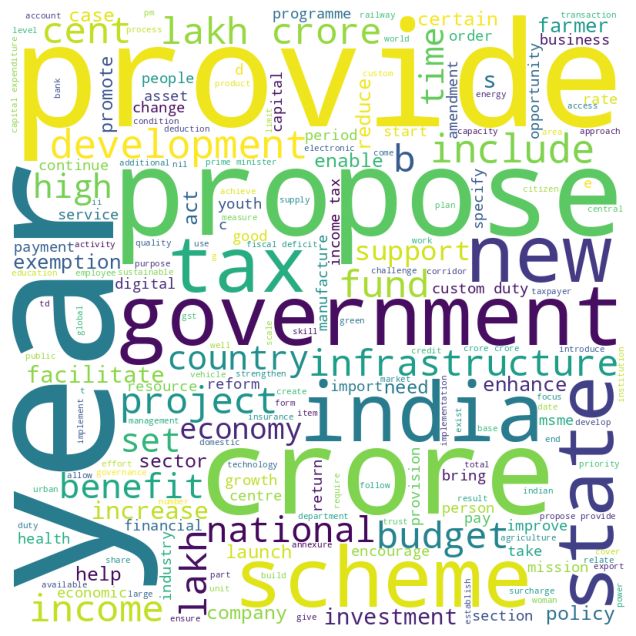

In [ ]:
# Distribution of words in the data
from wordcloud import WordCloud
for i in text:
  text1 = " ".join(text)
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white').generate(text1)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")

In [ ]:
# Bigram generation
from nltk.util import ngrams
def generate_word_ngrams(words, n):
    word_ngrams = list(ngrams(words, n))
    return word_ngrams
bigram = generate_word_ngrams(text, 2)
print(f"{2}-grams for the list of words {text[:20]}:")
print(bigram[:20])


2-grams for the list of words ['government', 'india', 'interim', 'budget', 'speech', 'nirmala', 'sitharaman', 'minister', 'finance', 'february', 'content', '–', 'page', 'introduction', 'inclusive', 'development', 'growth', 'social', 'justice', 'exemplary']:
[('government', 'india'), ('india', 'interim'), ('interim', 'budget'), ('budget', 'speech'), ('speech', 'nirmala'), ('nirmala', 'sitharaman'), ('sitharaman', 'minister'), ('minister', 'finance'), ('finance', 'february'), ('february', 'content'), ('content', '–'), ('–', 'page'), ('page', 'introduction'), ('introduction', 'inclusive'), ('inclusive', 'development'), ('development', 'growth'), ('growth', 'social'), ('social', 'justice'), ('justice', 'exemplary'), ('exemplary', 'track')]


CONVERT PREPROCESSED TEXT TO CORPUS

In [ ]:
id2word=corpora.Dictionary(bigram)
print(id2word)
texts=bigram
corpus=[id2word.doc2bow(word) for word in bigram]

Dictionary<4520 unique tokens: ['government', 'india', 'interim', 'budget', 'speech']...>


In [ ]:
# Tf-idf vectorization
from gensim.models import TfidfModel
tfidf = TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]


In [ ]:
# Model to perfrom topic modelling
lda_model = gensim.models.LdaModel(corpus=corpus_tfidf,
                                       id2word=id2word,
                                       num_topics=12)


print(lda_model.print_topics())

[(0, '0.102*"income" + 0.096*"infrastructure" + 0.073*"fund" + 0.052*"provision" + 0.043*"section" + 0.036*"manufacture" + 0.031*"department" + 0.023*"development" + 0.023*"private" + 0.023*"use"'), (1, '0.092*"custom" + 0.056*"include" + 0.043*"agriculture" + 0.040*"c" + 0.026*"resource" + 0.025*"school" + 0.025*"urban" + 0.024*"basic" + 0.024*"power" + 0.023*"d"'), (2, '0.089*"duty" + 0.064*"rate" + 0.040*"b" + 0.034*"part" + 0.030*"item" + 0.029*"e" + 0.029*"customs" + 0.028*"certain" + 0.027*"s" + 0.027*"company"'), (3, '0.048*"set" + 0.047*"development" + 0.042*"condition" + 0.036*"take" + 0.032*"ensure" + 0.032*"create" + 0.030*"enable" + 0.024*""" + 0.024*"economy" + 0.023*"gst"'), (4, '0.053*"reduce" + 0.053*"increase" + 0.042*"return" + 0.040*"date" + 0.040*"compliance" + 0.037*"’s" + 0.034*"health" + 0.030*"–" + 0.024*"burden" + 0.022*"institution"'), (5, '0.102*"provide" + 0.074*"\uf0b7" + 0.050*"capital" + 0.047*"india" + 0.034*"case" + 0.031*"value" + 0.028*"steel" + 0.027

DISTRIBUTION OF WORDS OVER TOPICS

In [ ]:
# Topics and the words associated in each topic
pyLDAvis.enable_notebook()
vis=pyLDAvis.gensim_models.prepare(lda_model,corpus_tfidf,id2word,mds="mmds",R=50)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
11     0.400758  0.154287       1        1  9.783509
8      0.338768 -0.253244       2        1  9.245076
9     -0.321450 -0.262365       3        1  8.740817
2     -0.065723 -0.399534       4        1  8.731958
5     -0.078426  0.046795       5        1  8.591644
7     -0.381262  0.142433       6        1  8.225970
4      0.249872 -0.013040       7        1  8.132344
6      0.105558 -0.251709       8        1  7.866281
1      0.167676  0.348075       9        1  7.719645
10     0.008540  0.282335      10        1  7.688271
3     -0.196229  0.292436      11        1  7.685051
0     -0.228083 -0.086469      12        1  7.589434, topic_info=             Term        Freq       Total Category  logprob  loglift
1120      propose  459.000000  459.000000  Default  50.0000  50.0000
549           tax  373.000000  373.000000  Default  49.0000  49.0000
191         crore  351.000000  351.000000  Default  48.0000  48.0000
325       provide  318.000000  318.000000  Default  47.0000  47.0000
204        income  297.000000  297.000000  Default  46.0000  46.0000
...           ...         ...         ...      ...      ...      ...
960       railway   10.295120   18.157641  Topic12  -5.5854   2.0110
15    development   63.680598  200.459549  Topic12  -3.7632   1.4317
2493         cgst    5.572529   19.069804  Topic12  -6.1992   1.3482
53           year    7.443663  274.816495  Topic12  -5.9097  -1.0303
518    investment    5.703459  156.776266  Topic12  -6.1760  -0.7353

[682 rows x 6 columns], token_table=      Topic      Freq Term
term                      
612      11  0.971639    "
30        3  0.010090    '
30        4  0.010090    '
30        5  0.010090    '
30        6  0.908065    '
...     ...       ...  ...
11        7  0.980988    –
819       8  0.971187    ’
224       5  0.017682   ’s
224       7  0.963644   ’s
124       5  0.993137    

[756 rows x 3 columns], R=50, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[12, 9, 10, 3, 6, 8, 5, 7, 2, 11, 4, 1])

In [ ]:
# Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=bigram, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()

print('\nCoherence Score: ', coherence_lda)



Coherence Score:  0.6892304749061648
